In [11]:

import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [12]:


(train_images, train_labels), (test_images, test_labels) =tf.keras.datasets.mnist.load_data(path="mnist.npz")

train_images, test_images = train_images / 255.0, test_images / 255.0



In [13]:
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),  # Flatten the 28x28 images into a 1D vector
    layers.Dense(128, activation='relu'),  # Fully connected layer with ReLU activation
    layers.Dropout(0.2),  # Dropout layer to reduce overfitting
    layers.Dense(10, activation='softmax')  # Output layer with 10 classes (digits 0-9)
])

In [14]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
history = model.fit(train_images, train_labels, epochs=5, validation_split=0.2)


Epoch 1/5
1500/1500 [==============================] - 7s 4ms/step - loss: 0.3250 - accuracy: 0.9067 - val_loss: 0.1577 - val_accuracy: 0.9558
Epoch 2/5
1500/1500 [==============================] - 5s 4ms/step - loss: 0.1615 - accuracy: 0.9522 - val_loss: 0.1207 - val_accuracy: 0.9653
Epoch 3/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1200 - accuracy: 0.9645 - val_loss: 0.1039 - val_accuracy: 0.9682
Epoch 4/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0974 - accuracy: 0.9702 - val_loss: 0.0946 - val_accuracy: 0.9719
Epoch 5/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0800 - accuracy: 0.9761 - val_loss: 0.0835 - val_accuracy: 0.9743


In [16]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_accuracy}")


313/313 [==============================] - 1s 3ms/step - loss: 0.0788 - accuracy: 0.9757
Test accuracy: 0.9757000207901001


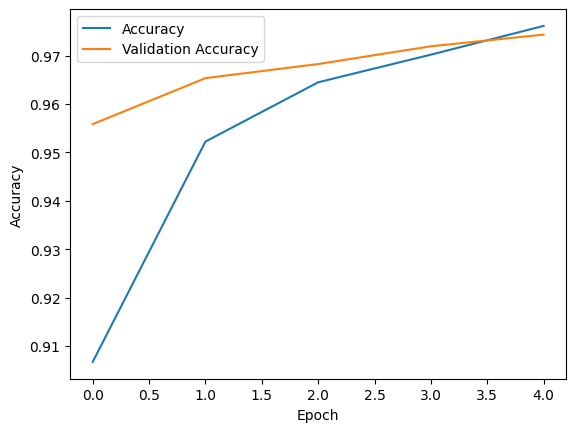

In [17]:
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [18]:
predictions = model.predict(test_images)


313/313 [==============================] - 1s 2ms/step


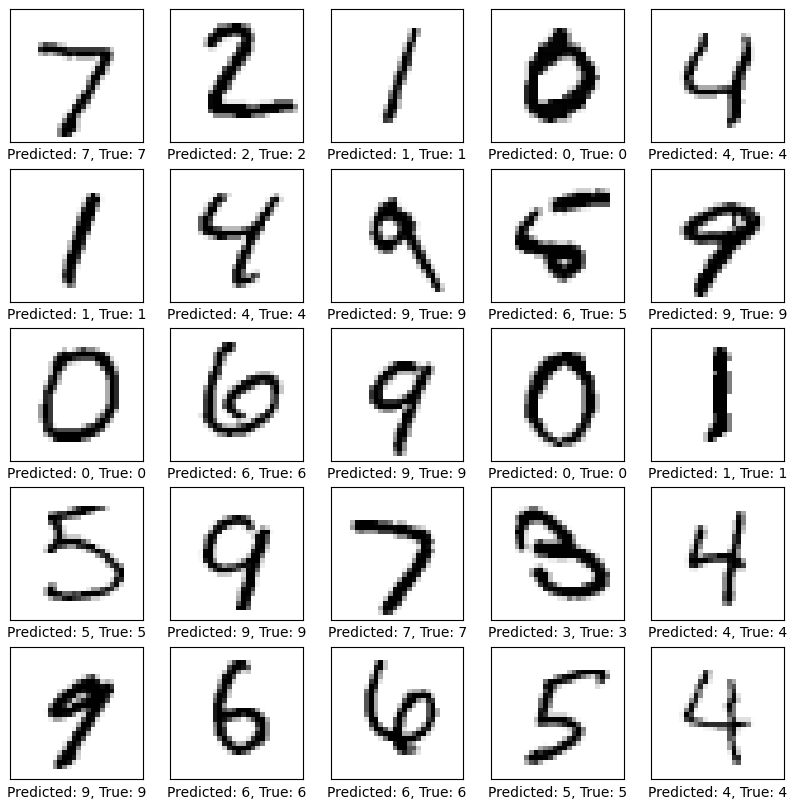

In [19]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    predicted_label = tf.argmax(predictions[i])
    true_label = test_labels[i]
    plt.xlabel(f"Predicted: {predicted_label}, True: {true_label}")

plt.show()
